In [13]:
import pandas as pd
import altair as alt
import datetime
import numpy as np
import glob
from datetime import datetime
import selenium
from IPython.display import display
alt.renderers.enable('notebook')
print(alt.renderers.active)
import jenkspy


notebook


In [9]:
jenksdata=pd.read_csv("../RawData/Jenks_basis.csv")
jenksdata

,Jahr,Lugano,Basel-Binningen,Genève-Cointrin,Luzern,Sion,Bern-Zollikofen,Zürich-Fluntern,St. Gallen
0,1960,18.73,16.80,17.37,16.00,17.23,15.40,15.97,14.60
1,1961,19.70,16.97,17.57,16.43,17.87,15.77,16.20,14.73
2,1962,20.20,17.37,18.17,16.60,18.67,16.37,16.67,14.90
3,1963,19.23,17.27,17.30,16.40,17.70,15.80,16.47,15.03
4,1964,20.13,18.37,18.90,17.50,18.87,17.03,17.47,15.87
5,1965,19.43,16.70,17.00,15.77,16.90,15.33,15.60,14.27
6,1966,19.00,16.63,17.67,15.83,17.37,15.60,15.57,14.27
7,1967,20.40,17.53,18.10,17.03,18.50,16.63,16.70,15.50
8,1968,18.63,16.70,17.00,15.80,17.47,15.23,15.77,14.37
9,1969,19.37,16.77,17.27,15.97,17.23,15.40,15.87,14.33


In [16]:
jenksdata=jenksdata[["Lugano","Basel-Binningen","Genève-Cointrin","Luzern","Sion","Bern-Zollikofen","Zürich-Fluntern","St. Gallen"]]

In [22]:
jenksdatalist= jenksdata.values.tolist()
flat_list = [item for sublist in jenksdatalist for item in sublist]

UKbreaks = jenkspy.jenks_breaks(flat_list, nb_class=5)
UKbreaks

[13.9, 16.2, 17.7, 19.13, 20.83, 24.2]

In [21]:
max(flat_list)

24.2

In [30]:
data_temp=pd.read_csv("../RawData/schweizerdurchschnitt.csv")
data_temp["time"]=pd.to_datetime(data_temp["time"],format="%Y")
data_temp["time"] = data_temp["time"].dt.strftime('%Y')

data_temp

,time,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,djf,mam,jja,son,winter,summer,year
0,1864,-7.10,-4.52,0.04,2.11,7.43,9.48,12.37,10.95,8.59,3.50,-0.51,-4.47,NaN,3.19,10.93,3.86,NaN,8.49,3.16
1,1865,-3.47,-6.25,-5.91,7.03,10.09,10.98,13.99,11.16,11.90,5.19,1.26,-3.07,-4.73,3.74,12.04,6.12,-2.85,10.86,4.41
2,1866,-1.31,-0.42,-1.00,4.11,4.95,12.02,12.25,9.98,9.70,5.34,-0.20,-0.49,-1.60,2.69,11.42,4.95,0.11,8.84,4.58
3,1867,-3.87,0.56,-0.13,3.49,7.74,10.57,11.29,12.93,10.43,2.92,-1.43,-5.80,-1.27,3.70,11.60,3.97,0.20,9.41,4.06
4,1868,-5.46,-1.53,-2.30,2.33,12.04,11.97,12.89,12.50,11.12,4.76,-1.98,1.27,-4.26,4.02,12.45,4.63,-2.27,10.47,4.80
5,1869,-4.62,1.28,-4.25,4.53,8.92,8.26,14.82,10.86,10.35,2.30,0.09,-4.18,-0.69,3.07,11.31,4.25,-0.59,9.62,4.03
6,1870,-5.47,-4.23,-2.59,2.81,8.89,11.41,14.40,9.84,8.16,4.06,-0.14,-6.81,-4.62,3.04,11.88,4.03,-2.35,9.25,3.36
7,1871,-7.82,-1.96,0.02,3.53,6.66,7.27,13.14,12.60,11.33,3.31,-2.85,-8.30,-5.53,3.41,11.00,3.93,-2.11,9.09,3.08
8,1872,-3.22,-2.09,0.47,3.95,6.07,10.08,13.45,10.87,10.18,5.33,1.78,-0.77,-4.54,3.50,11.47,5.76,-2.11,9.10,4.67
9,1873,-2.19,-3.85,1.66,1.62,5.10,10.54,14.52,13.55,8.67,5.45,0.65,-2.88,-2.27,2.80,12.87,4.93,0.33,9.00,4.41


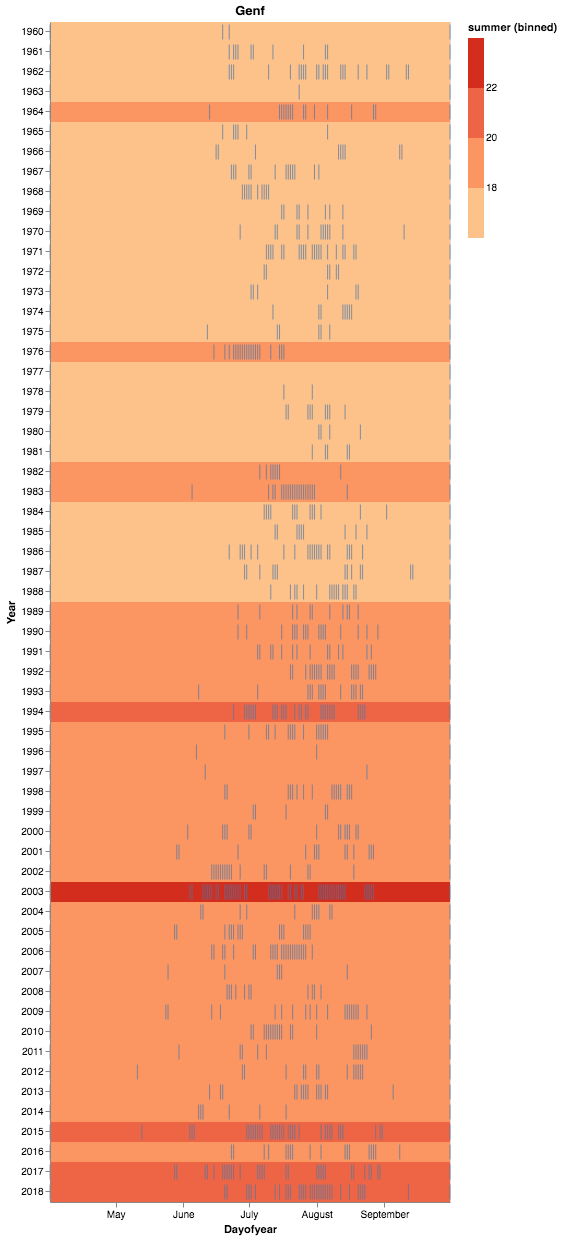

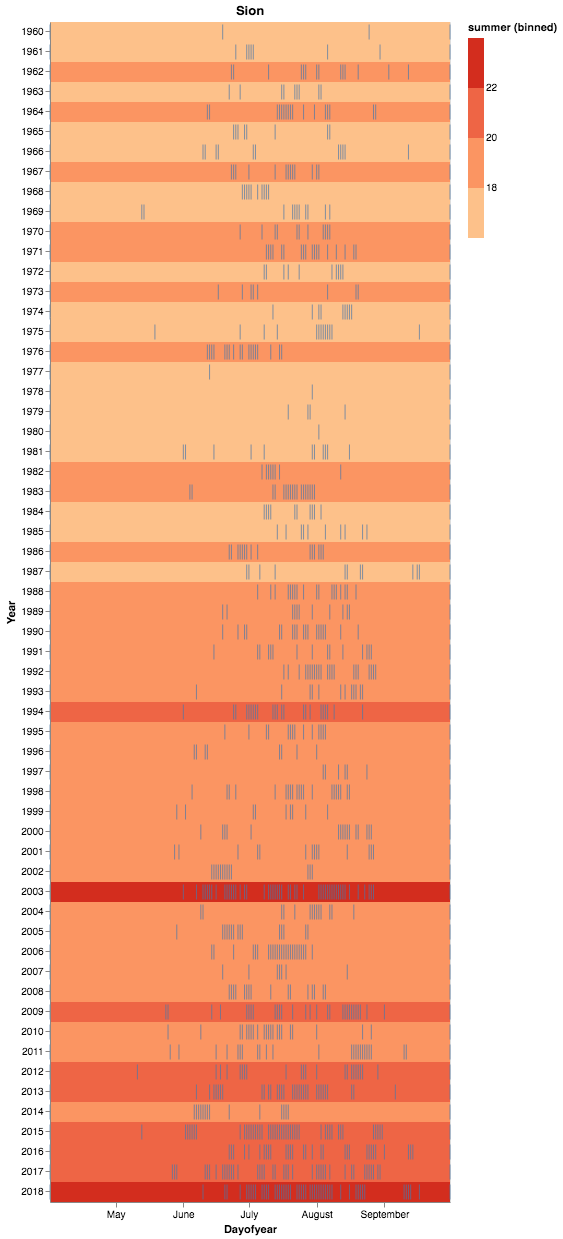

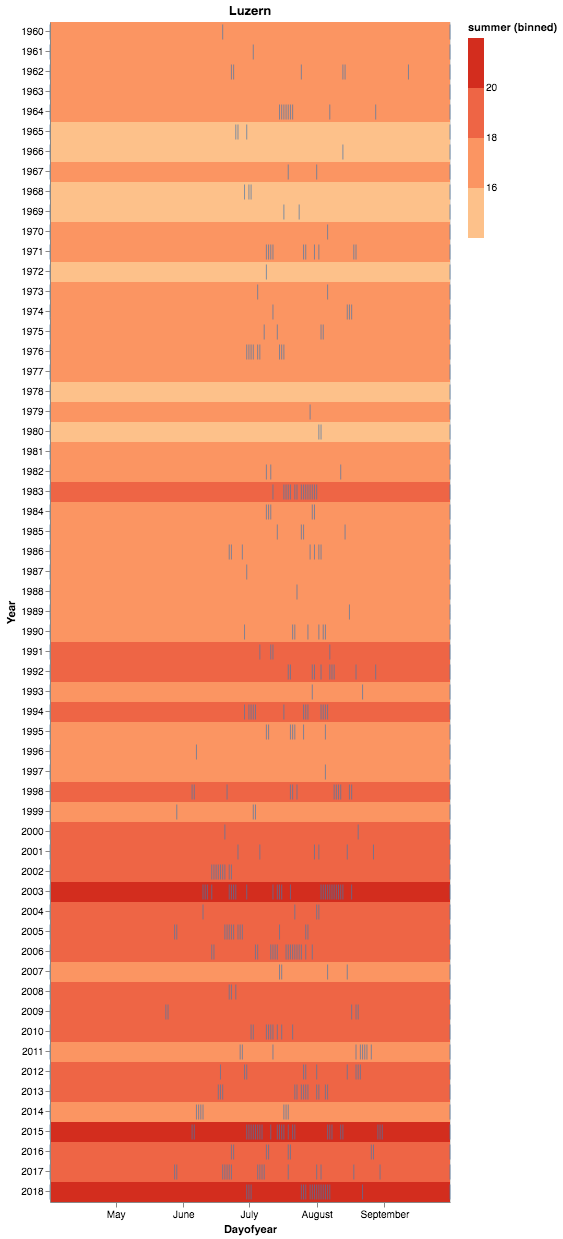

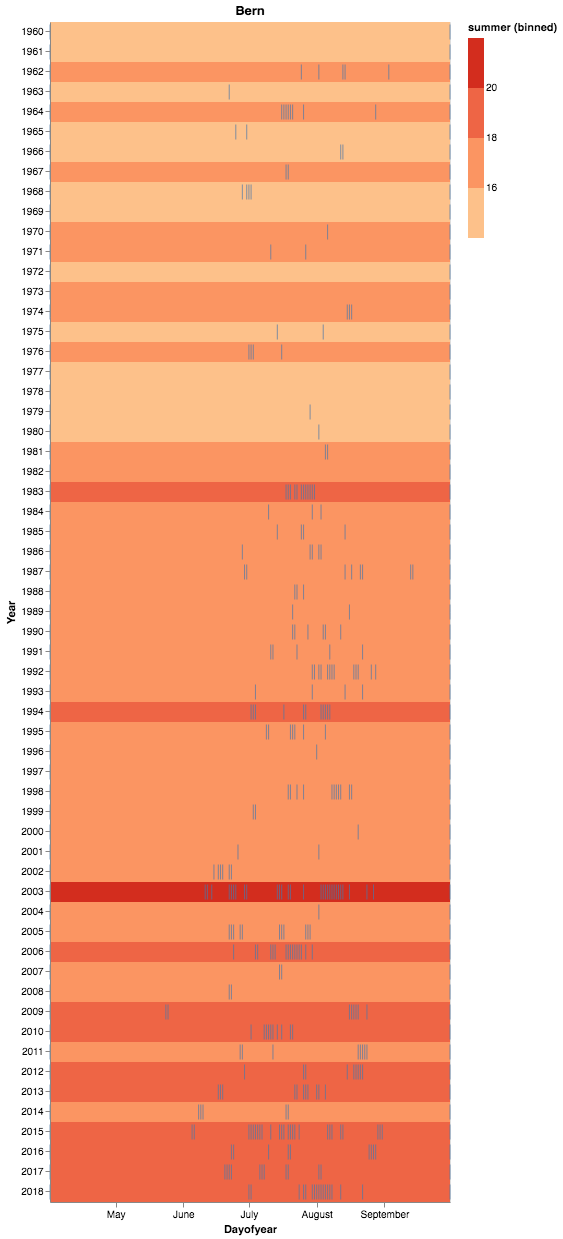

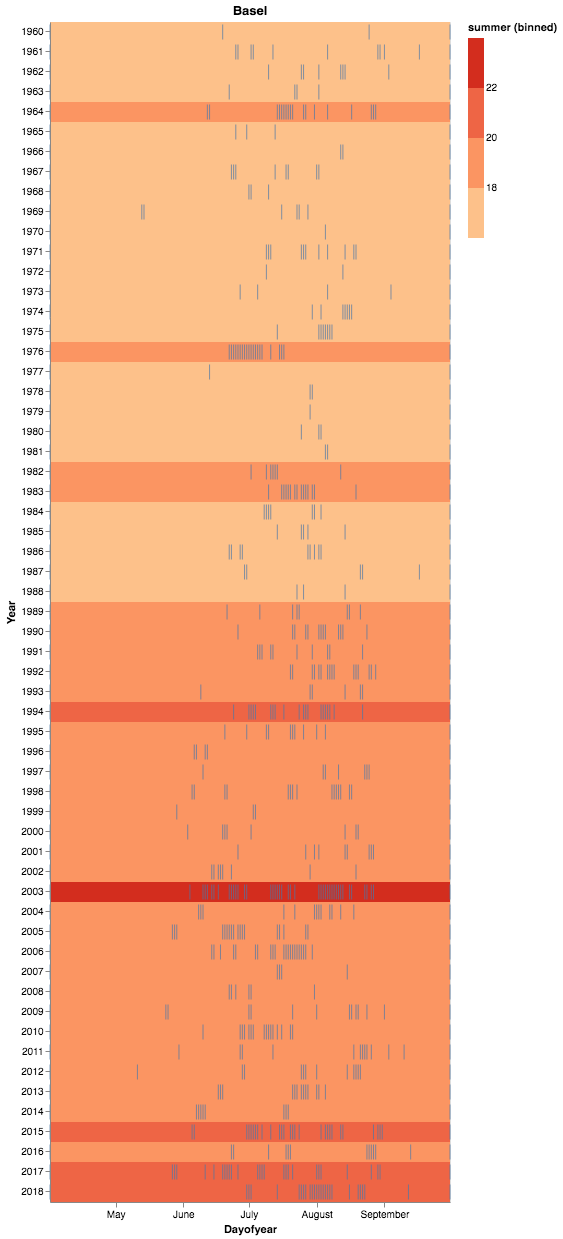

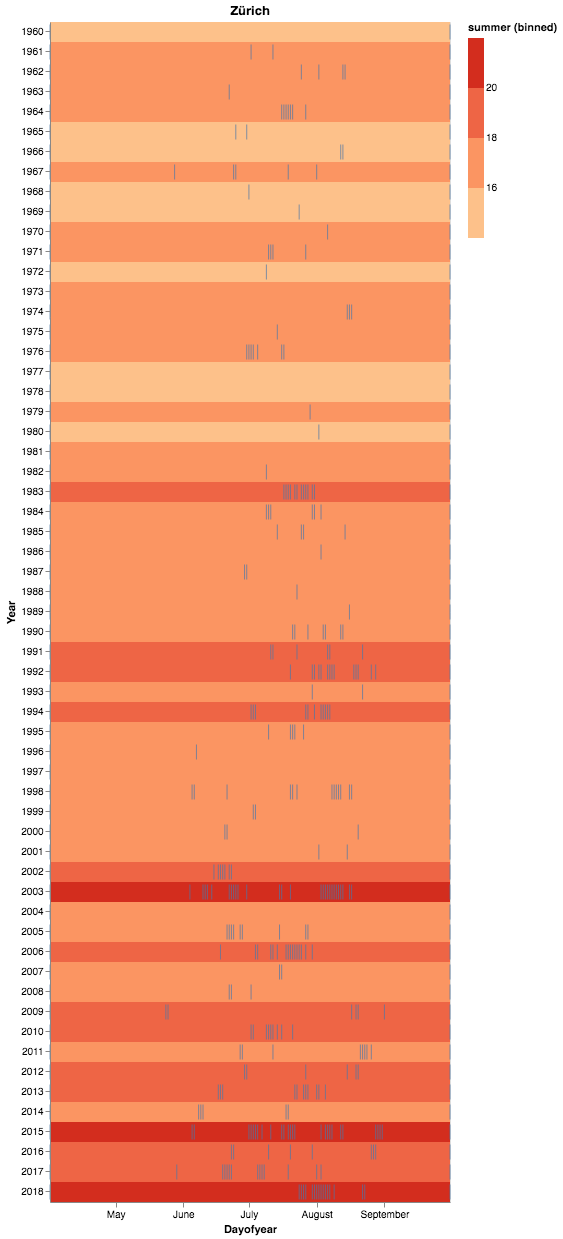

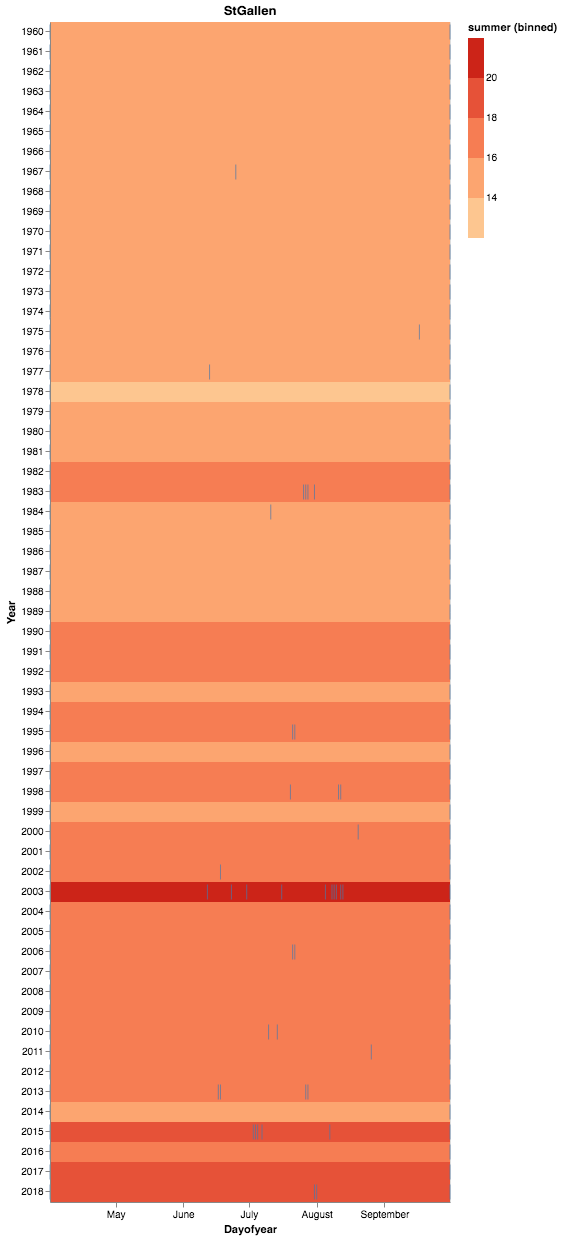

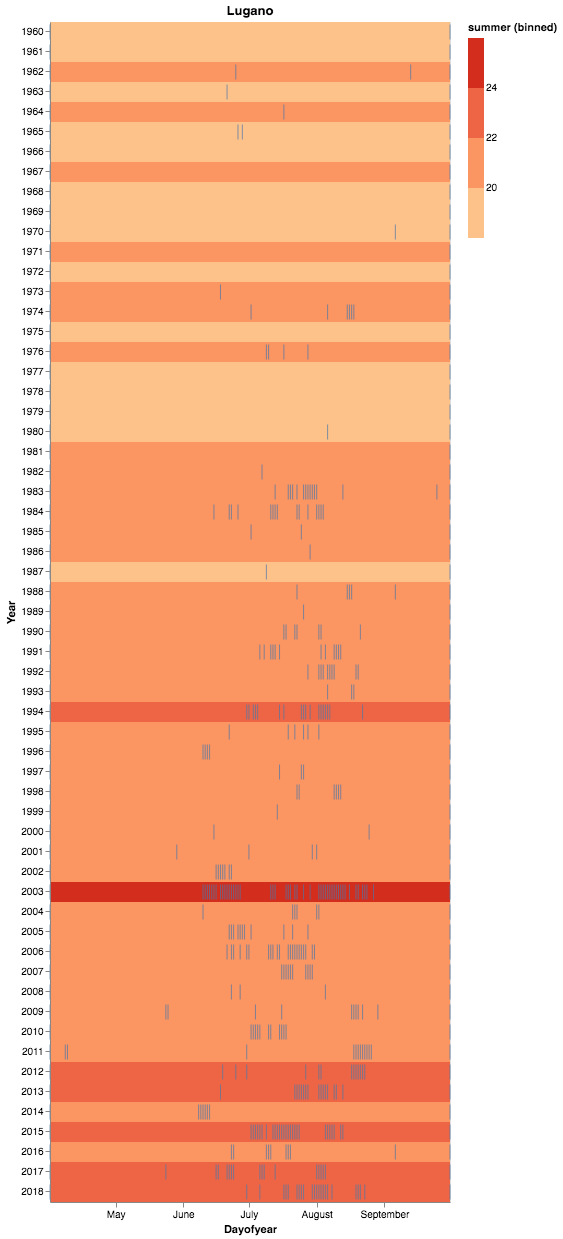

In [24]:
for filename in glob.glob("../RawData/cities/*"):
    stadtname=(filename[18:-4])
    data_hitz=pd.read_csv(filename)
    data_hitz["Datum"] = pd.to_datetime(data_hitz["Datum"] ,format="%m/%d/%Y")
    data_hitz["Year"] = data_hitz["Datum"].dt.strftime('%Y')
    data_hitz["Dayofyear"] = data_hitz["Datum"].dt.strftime('%m-%d')
    for i in list(range(1960,2019)):
        i=(str(i))
        data_hitz = data_hitz.append({'Year' : i, "Dayofyear":"04-01"} , ignore_index=True)
        data_hitz = data_hitz.append({'Year' : i, "Dayofyear":"10-01"} , ignore_index=True)

    data_temp=pd.read_csv("../RawData/summer_incities/"+stadtname+".csv")
    data_temp["Year"]=pd.to_datetime(data_temp["Year"],format="%Y")
    data_temp["Year"] = data_temp["Year"].dt.strftime('%Y')

    data_temp
    newdata=pd.merge(data_hitz, data_temp, right_on="Year", left_on="Year",how="inner")
    newdata=newdata[newdata["Year"]!=str(2019)]
    axislist=["05-01","06-01","07-01","08-01","09-01"]
    heatdays=alt.Chart(newdata).mark_tick().encode(
        alt.X('Dayofyear:T', axis=alt.Axis(values=axislist)),
        y="Year:O",
    )
    heatmap = alt.Chart(newdata,title=stadtname).mark_rect().encode(
    alt.Y('Year:O'),
    alt.Color('summer:Q',bin=alt.Bin(maxbins=5), scale=alt.Scale(scheme='orangered')),
    )
    heatmap
    combined=heatmap + heatdays
    combined.display()
    combined.save("../Vis/"+stadtname+".png")

In [32]:
data_hitz=pd.read_csv("../RawData/test.csv")
data_hitz["Datum"] = pd.to_datetime(data_hitz["Datum"] ,format="%m/%d/%Y")
data_hitz["Year"] = data_hitz["Datum"].dt.strftime('%Y')
data_hitz["Dayofyear"] = data_hitz["Datum"].dt.strftime('%m-%d')
data_hitz

,Datum,Tagesmaximum,Year,Dayofyear
0,1961-07-02,30.2,1961,07-02
1,1961-07-12,30.5,1961,07-12
2,1962-07-25,31.3,1962,07-25
3,1962-08-02,30.7,1962,08-02
4,1962-08-13,30.6,1962,08-13
5,1962-08-14,31.6,1962,08-14
6,1963-06-22,30.6,1963,06-22
7,1964-07-16,31.5,1964,07-16
8,1964-07-17,31.7,1964,07-17
9,1964-07-18,32.3,1964,07-18


In [6]:
newdata=pd.merge(data_hitz, data_temp, right_on="time", left_on="Year",how="inner")

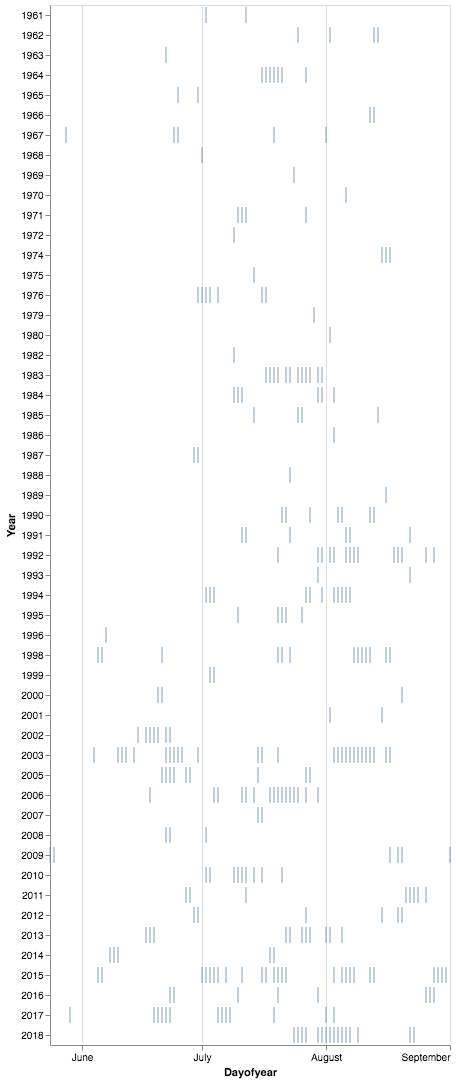

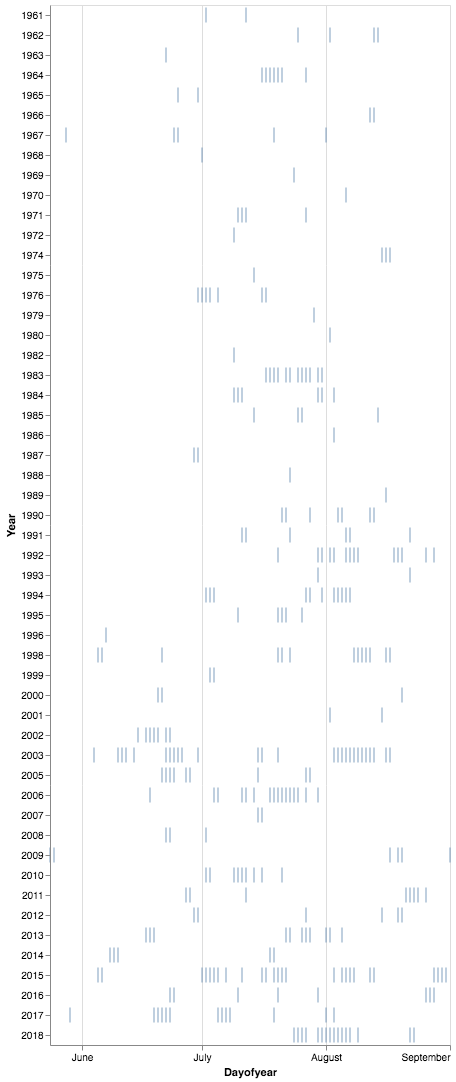

In [8]:
axislist=["05-01","06-01","07-01","08-01","09-01"]
heatdays=alt.Chart(newdata).mark_tick().encode(
    alt.X('Dayofyear:T', axis=alt.Axis(values=axislist)),
    y="Year:O",
)
heatdays.display()

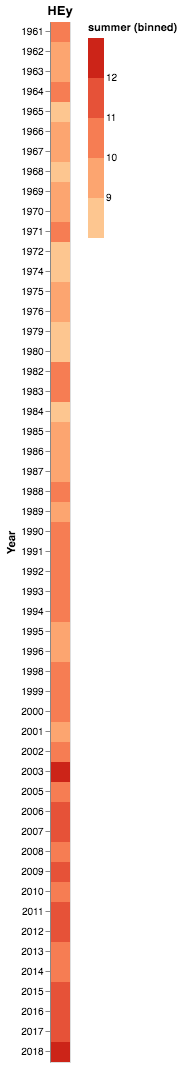

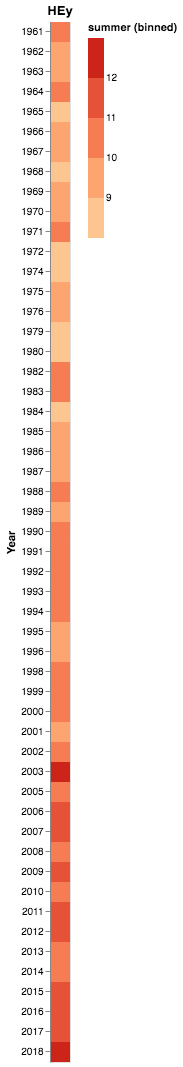

In [14]:
heatmap = alt.Chart(newdata,title="HEy").mark_rect().encode(
    alt.Y('Year:O'),
    alt.Color('summer:Q',bin=True, scale=alt.Scale(scheme='orangered')),
    
)
heatmap

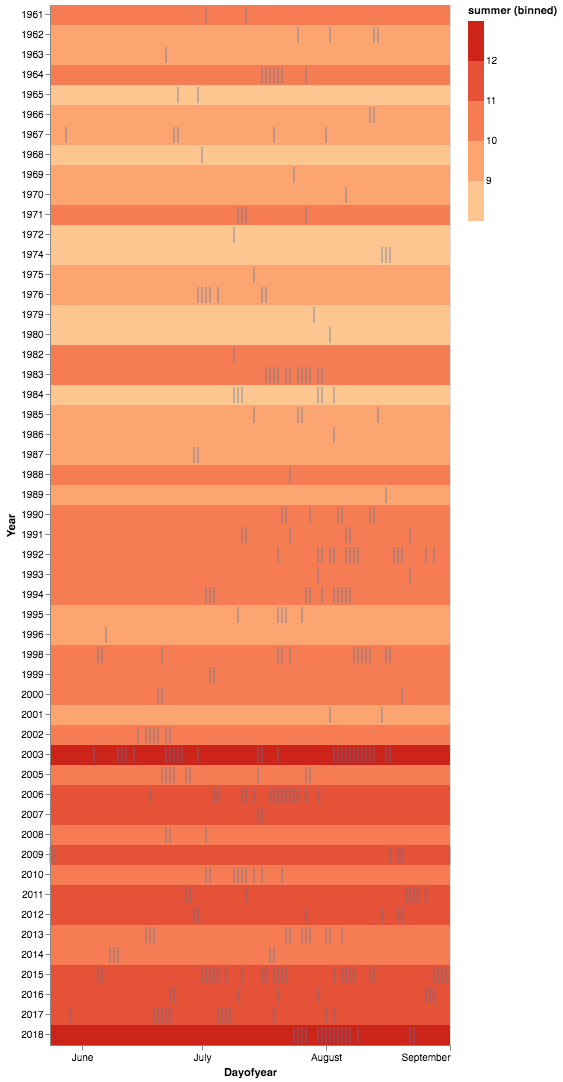

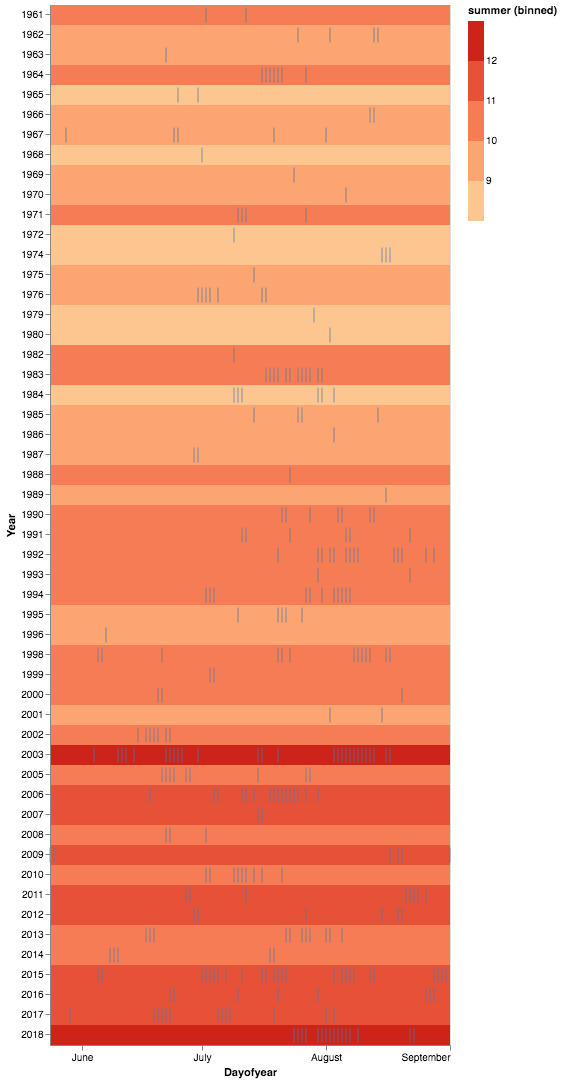

In [10]:
combined=heatmap + heatdays
combined.display()